Customer Segmentation

In [1]:
#Import necessary Libraries
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')

+ Loaded dataset

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


+ Our dataset is small, we need to encode Gender feature and Drop customer ID because it wont help in our analysis

In [4]:
df.drop('CustomerID', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


+ Check data types of features

In [6]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

+ Our dataset doesn't have any missing value or duplicated value

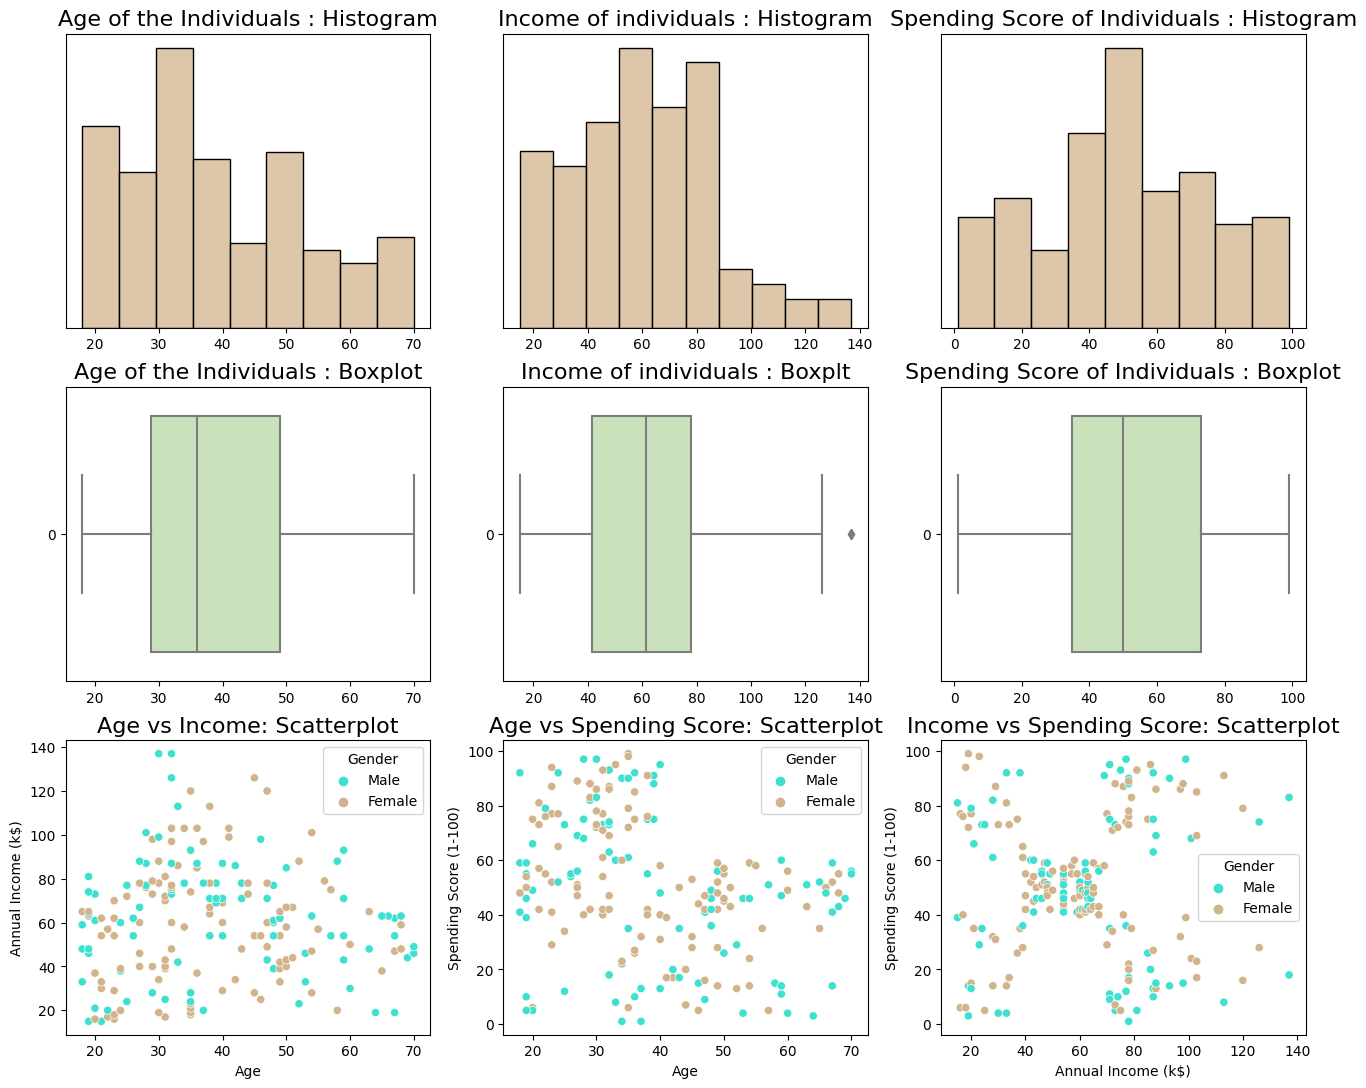

In [8]:
## Let's understand the patterns and trends in the numerical variables
## Age, Income, and Spend Score are the 3 numerical variables we have here

plt.subplots(figsize=(16,13))

plt.subplot(3,3,1)
plt.title('Age of the Individuals : Histogram', fontsize=16)
sns.histplot(df['Age'], color='#D2B48C', kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,2)
plt.title('Income of individuals : Histogram', fontsize=16)
sns.histplot(df['Annual Income (k$)'], color='#D2B48C', kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,3)
plt.title('Spending Score of Individuals : Histogram', fontsize=16)
sns.histplot(df['Spending Score (1-100)'], color='#D2B48C', kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,4)
plt.title('Age of the Individuals : Boxplot', fontsize=16)
sns.boxplot(df['Age'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,5)
plt.title('Income of individuals : Boxplt', fontsize=16)
sns.boxplot(df['Annual Income (k$)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,6)
plt.title('Spending Score of Individuals : Boxplot', fontsize=16)
sns.boxplot(df['Spending Score (1-100)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,7)
plt.title('Age vs Income: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender', palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,8)
plt.title('Age vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,9)
plt.title('Income vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.show()

+ Income is slightly skewed and have one outlier but not all the population have high salaries so we will leave it as it is.
+ Younger people tends to order more.
+ Customers spend not too little or too much, spending score seems normally distributed 
+ Age and Income doesn't have any proper pattern.
+ Age and Spending Score seems to have little pattern like maybe 2 or 3 clusters.
+ Income and Spending score shows proper pattern which is making 5 clusters.
+ Since all the 3 scatter plot aren't showing any Gender specific separation/pattern and seems to have equally distributed in whole data points, we will drop it.

In [9]:
df.drop('Gender',axis=1,inplace=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

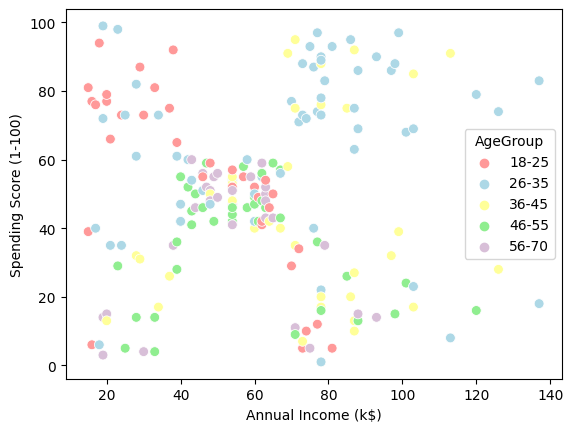

In [10]:
bins = [18, 25, 35, 45, 55, 70]
labels = ['18-25', '26-35', '36-45', '46-55', '56-70']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

custom_palette = sns.color_palette(['#FF9999', '#ADD8E6', '#FFFF99', '#90EE90', '#D8BFD8', '#FFCCE5'])

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='AgeGroup', data=df, palette=custom_palette, s=50)

+ Customer who are younger than 35 are spending more regardless of their income. More like when Age increase spending score decrease.

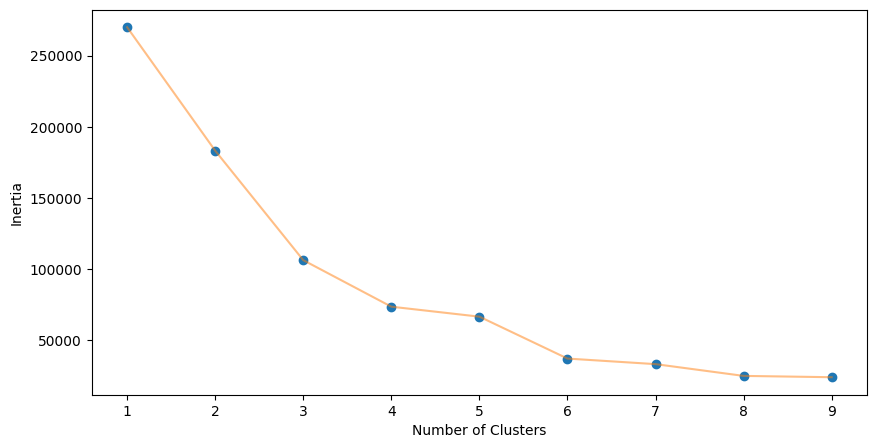

In [11]:
# Write a for loop to check inertia in our dataset. Since our dataset 
inertias = []

for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']]) 
    inertias.append(km.inertia_)

# Create a elbow plot to check how many clsuters are in our dataset
plt.figure(1, figsize=(10, 5))
plt.plot(np.arange(1, 10), inertias, 'o')
plt.plot(np.arange(1, 10), inertias, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()


+ Inertia shows 5 clusters in our dataset

In [12]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,19,15,39,18-25
1,21,15,81,18-25
2,20,16,6,18-25
3,23,16,77,18-25
4,31,17,40,26-35


In [13]:
df.drop('AgeGroup',axis=1,inplace=True)

+ Dropped the feature we have created to plot.

In [14]:
km5 = KMeans(n_clusters=5)
km5.fit(df)

KMeans(n_clusters=5)

+ Create K-Means Clustering variable with 5 clusters as input.

In [15]:
df['cluster_5'] = km5.predict(df)
df['cluster_5']

0      4
1      3
2      4
3      3
4      4
      ..
195    0
196    2
197    0
198    2
199    0
Name: cluster_5, Length: 200, dtype: int32

+ Predicted data points belong to which clusters.

In [16]:
df5 = pd.DataFrame({'cluster_5': df['cluster_5'],'Annual Income':df['Annual Income (k$)'], 'Spending Score':df['Spending Score (1-100)']})

+ Create DataFrame to plot and apply value counts to check most of the data points belong to which category.

In [17]:
df5.value_counts('cluster_5')

cluster_5
1    76
0    39
2    37
3    25
4    23
Name: count, dtype: int64

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

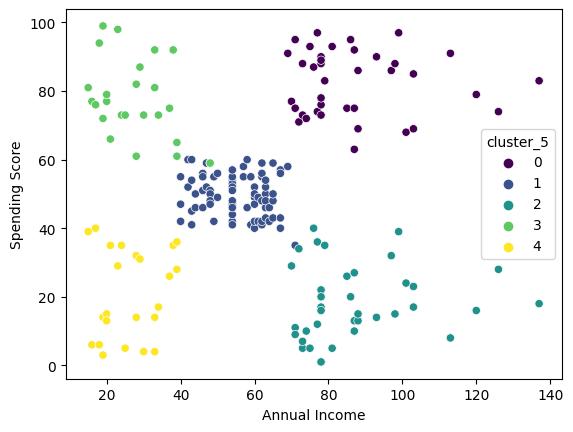

In [18]:
sns.scatterplot(x='Annual Income',y='Spending Score',data=df5,hue='cluster_5',palette='viridis')

+ Our model didn't differenciate all 5 patterns properly maybe because of high value bias 
+ We will do scaling to make all values importance same for our model.

In [19]:
from sklearn.preprocessing import StandardScaler

#Scaling dataframe and creating new variable for
X = df[['Annual Income (k$)', 'Spending Score (1-100)','Age']].copy()
df_scaled = StandardScaler()
df_x = df_scaled.fit_transform(X)
df_x = pd.DataFrame(df_x, columns=X.columns)
print(df_x.head(5))

   Annual Income (k$)  Spending Score (1-100)       Age
0           -1.738999               -0.434801 -1.424569
1           -1.738999                1.195704 -1.281035
2           -1.700830               -1.715913 -1.352802
3           -1.700830                1.040418 -1.137502
4           -1.662660               -0.395980 -0.563369


In [20]:
km = KMeans(n_clusters=5)
km.fit(df_x)

KMeans(n_clusters=5)

In [21]:
df_x['cluster'] = km.predict(df_x)

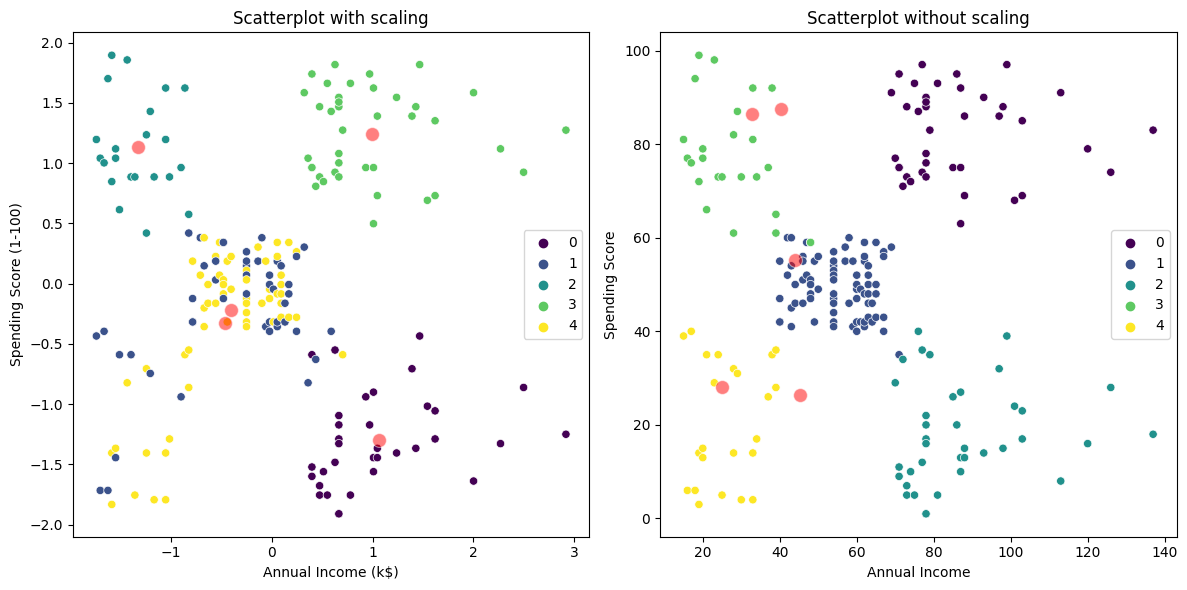

In [22]:
# Create subplots(scatterplots) with centroid to check difference
centroids_5 = km5.cluster_centers_
centroids = km.cluster_centers_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first scatterplot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_x, hue='cluster', palette='viridis', ax=axes[0])
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=100, color='red', alpha=0.5, ax=axes[0])
axes[0].set_title("Scatterplot with scaling")

# Plot the second scatterplot
sns.scatterplot(x='Annual Income', y='Spending Score', data=df5, hue='cluster_5', palette='viridis', ax=axes[1])
sns.scatterplot(x=centroids_5[:, 0], y=centroids_5[:, 1], s=100, color='red', alpha=0.5, ax=axes[1])
axes[1].set_title("Scatterplot without scaling")

plt.tight_layout()
plt.show()

+ Without scaling model seemed to gave more importance to high spending values.
+ After scaling model is better but still not dividing all clusters properly.

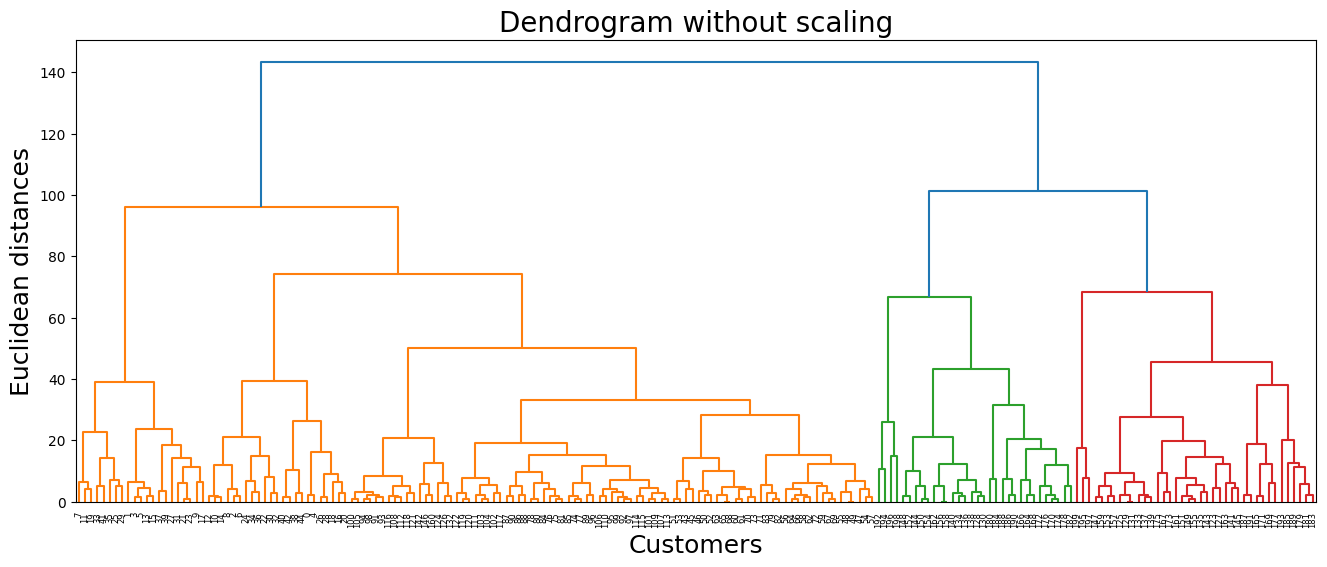

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram
#Plotting Dendogram with old not scaled data to use Hierarchy clustering.
plt.figure(figsize=(16,6))
mergings = linkage(df5, method='complete')
dendrogram(mergings,
leaf_rotation=90,
leaf_font_size=6)
plt.title('Dendrogram without scaling', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

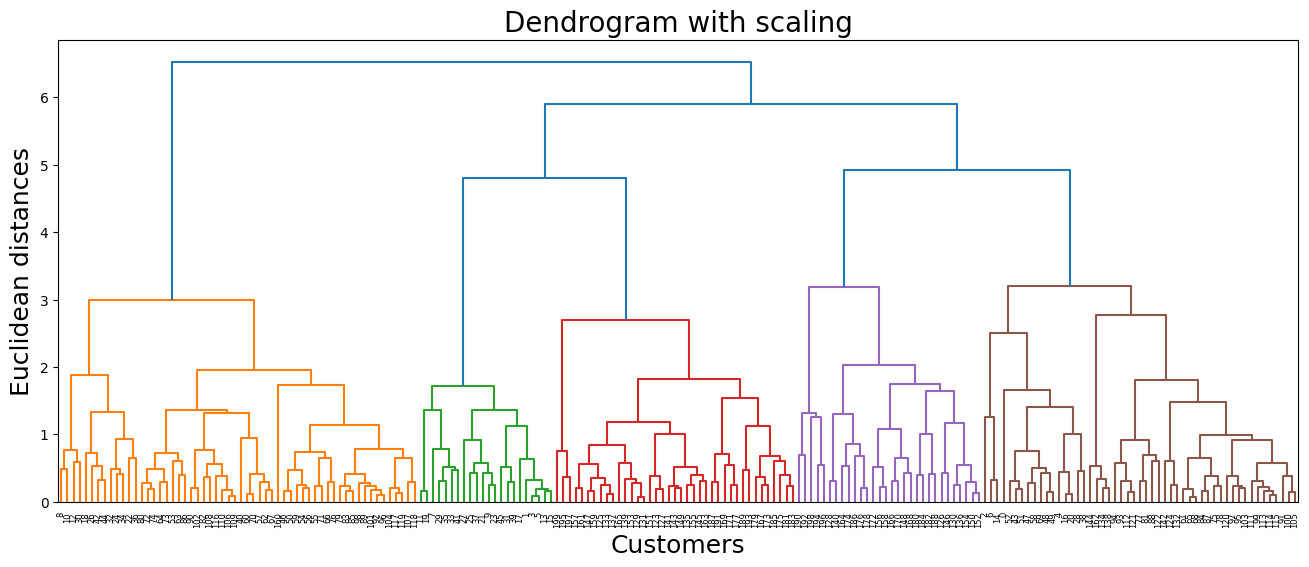

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram
#Plotting Dendogram with old scaled data to use Hierarchy clustering.
plt.figure(figsize=(16,6))
mergings = linkage(df_x, method='complete')
dendrogram(mergings,
leaf_rotation=90,
leaf_font_size=6)
plt.title('Dendrogram with scaling', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

+ Divided data into 5 clusters like seen in scatterplot.

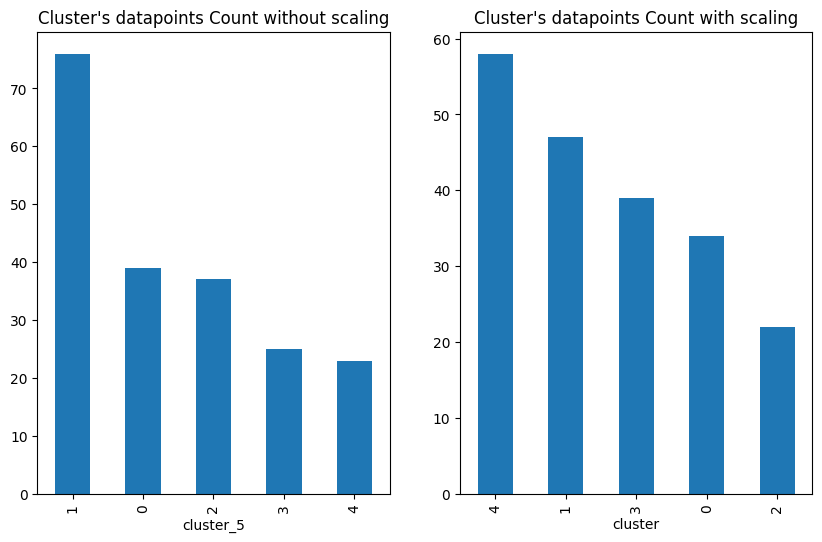

In [25]:
#Making plot to check which cluster have higher data point values.
label_counts_df5 = df5['cluster_5'].value_counts()
label_counts_df_x = df_x['cluster'].value_counts()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
label_counts_df5.plot(kind='bar', title="Cluster's datapoints Count without scaling")
plt.subplot(1, 2, 2)
label_counts_df_x.plot(kind='bar', title="Cluster's datapoints Count with scaling")
plt.show()

+ After scaling our dataset KMeans made most of the datapoints belong to one category.

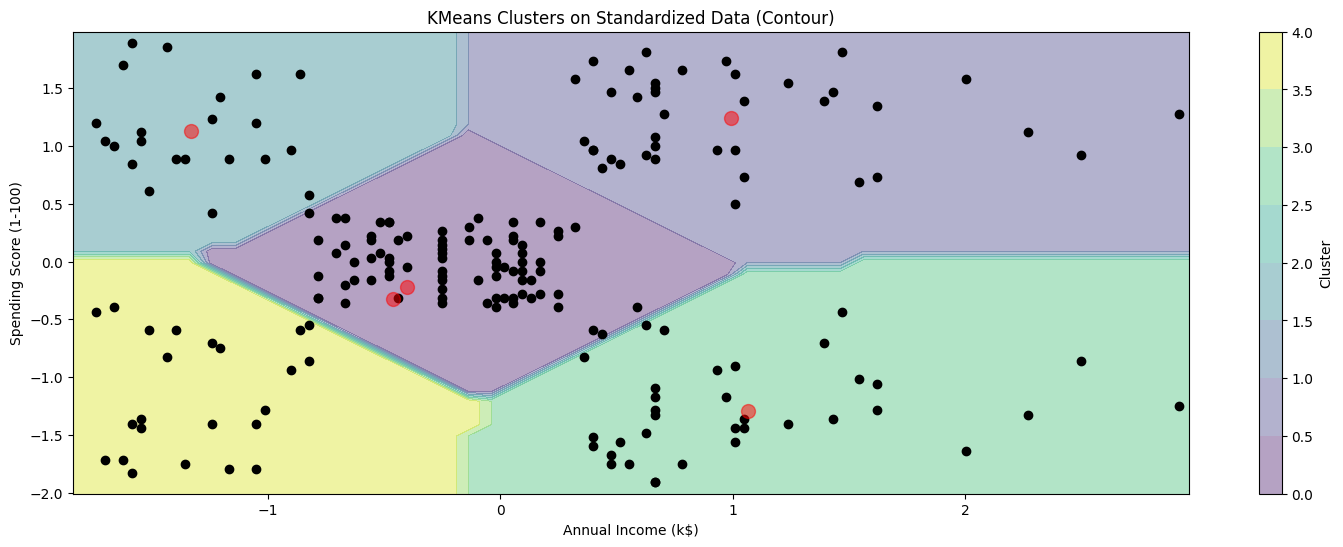

In [39]:
# Create dataframe again because df_x is df and we need array for contour plot with 2 features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features again
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the KMeans model with 5 clusters again
kmeans = KMeans(n_clusters=5, random_state=42)  # Set a random state for reproducibility

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Create a meshgrid for visualization using Annual Income and Spending Score
x_min, x_max = X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1
y_min, y_max = X_scaled[:, 1].min() - 0.1, X_scaled[:, 1].max() + 0.1
a = np.arange(start=x_min, stop=x_max, step=0.1)
b = np.arange(start=y_min, stop=y_max, step=0.1)
xx, yy = np.meshgrid(a, b)

# Create a 2D array of data points for prediction
input_array = np.c_[xx.ravel(), yy.ravel()]

# Predict cluster labels using the fitted KMeans model, reshape Z to make same shape for all 3, extract centroid.
Z = kmeans.predict(input_array)
Z = Z.reshape(xx.shape)
labels = kmeans.labels_
centroids = km.cluster_centers_


#Create the contour plot
plt.figure(figsize=(18, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.4)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clusters on Standardized Data (Contour)')
plt.colorbar(label='Cluster')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='k',c='black')
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 100 , c = 'red' , alpha = 0.5)
plt.show()

+ Clusters with their decision boundaries 